In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [52]:
character_deaths = pd.read_csv("GOT_character-deaths.csv")
predictions = pd.read_csv("GOT_character-predictions.csv")

In [53]:
#all titles must be lowercase in order to merge
character_deaths.columns= map(str.lower, character_deaths.columns)

In [54]:
#merge the two csv files
merged = character_deaths.merge(predictions, on='name')
merged.to_csv("output.csv", index=False)

In [127]:
all_characters = pd.read_csv("output.csv")
all_characters[["S.No", "name"]]

,S.No,name
0,1458,Addam Marbrand
1,289,Aemon Costayne
2,877,Aemon Estermont
3,1460,Aenys Frey
4,1623,Aeron Greyjoy
5,291,Aethan
6,293,Aggar
7,1188,Aggo
8,1626,Alayaya
9,882,Albar Royce


In [56]:
ic = all_characters.loc[all_characters['isPopular'] == 1].copy()
ic.head()

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
4,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,NaN,NaN,0,1,36.0,4,1,1,0.458194,1
37,Arianne Martell,House Martell,NaN,NaN,NaN,2.0,0,1,0,0,...,NaN,NaN,0,1,29.0,0,0,1,0.571906,1
47,Arya Stark,Stark,NaN,NaN,NaN,2.0,0,1,1,1,...,NaN,NaN,0,1,16.0,8,1,1,1.000000,1
48,Arys Oakheart,Lannister,300.0,4.0,21.0,57.0,1,1,1,1,...,NaN,NaN,0,1,NaN,0,0,1,0.344482,0
49,Asha Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,...,NaN,1.0,1,1,30.0,0,0,1,0.709030,1


In [125]:
ic = ic.reset_index(drop=True)
ic.head(20)

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,NaN,NaN,0,1,36.0,4,1,1,0.458194,1
1,Arianne Martell,House Martell,NaN,NaN,NaN,2.0,0,1,0,0,...,NaN,NaN,0,1,29.0,0,0,1,0.571906,1
2,Arya Stark,Stark,NaN,NaN,NaN,2.0,0,1,1,1,...,NaN,NaN,0,1,16.0,8,1,1,1.000000,1
3,Arys Oakheart,Lannister,300.0,4.0,21.0,57.0,1,1,1,1,...,NaN,NaN,0,1,NaN,0,0,1,0.344482,0
4,Asha Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,...,NaN,1.0,1,1,30.0,0,0,1,0.709030,1
5,Aurane Waters,Lannister,NaN,NaN,NaN,65.0,1,0,0,1,...,NaN,NaN,0,1,28.0,0,0,1,0.377926,1
6,Barristan Selmy,Targaryen,NaN,NaN,NaN,15.0,1,1,1,1,...,NaN,NaN,0,1,69.0,0,0,1,1.000000,1
7,Benjen Stark,Night's Watch,298.0,1.0,24.0,5.0,1,1,1,0,...,NaN,NaN,0,1,38.0,5,1,1,0.401338,1
8,Beric Dondarrion,None,300.0,4.0,27.0,42.0,1,1,1,0,...,NaN,NaN,0,1,23.0,0,0,1,0.434783,0
9,Bran Stark,House Stark,NaN,NaN,NaN,1.0,1,1,1,1,...,NaN,NaN,0,1,15.0,7,1,1,1.000000,1


In [58]:
ic['allegiances'].unique()

array(['House Greyjoy', 'House Martell', 'Stark', 'Lannister', 'Targaryen',
       "Night's Watch", 'None', 'House Stark', 'House Targaryen',
       'House Tully', 'House Lannister', 'Baratheon', 'Martell', 'Tyrell',
       'House Tyrell', 'Wildling', 'House Baratheon'], dtype=object)

                  0
House Greyjoy     4
House Martell     5
House Stark      12
House Targaryen   9
House Tully       2
House Lannister  18
House Tyrell      5
House Baratheon   4
House Arryn       0


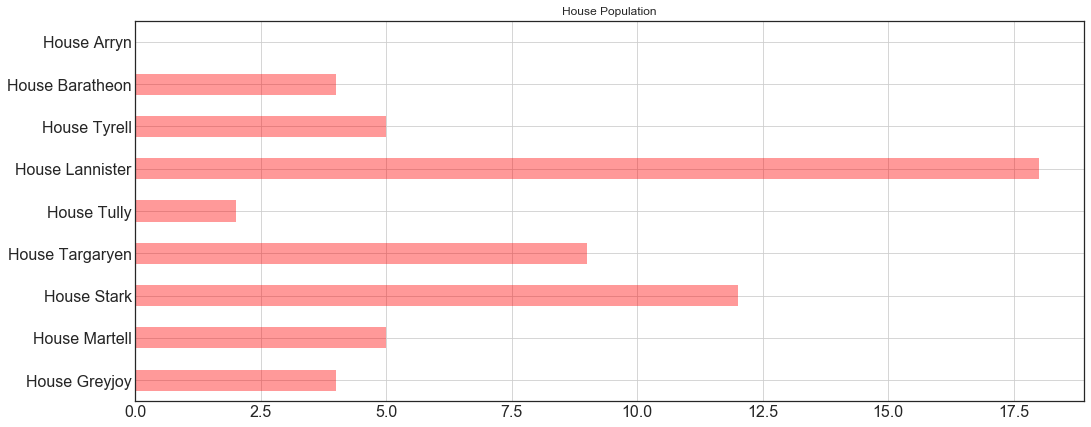

In [59]:
 house_count = Counter(ic['allegiances'])

#Summing u all the values into one house. People who belonged to stark have been added to house stark.
house_count['House Lannister'] = house_count['Lannister'] + house_count['House Lannister']
house_count['House Stark'] = house_count['Stark'] + house_count['House Stark']
house_count['House Tyrell'] = house_count['Tyrell'] + house_count['House Tyrell']
house_count['House Tully'] = house_count['Tully'] + house_count['House Tully']
house_count['House Targaryen'] = house_count['Targaryen'] + house_count['House Targaryen']
house_count['House Baratheon'] = house_count['Baratheon'] + house_count['House Baratheon']
house_count['House Martell'] = house_count['Martell'] + house_count['House Martell']
house_count['House Arryn'] = house_count['Arryn'] + house_count['House Arryn']
house_count['House Greyjoy'] = house_count['Greyjoy'] + house_count['House Greyjoy']

del(house_count['Greyjoy'], house_count['Arryn'], house_count['Martell'], house_count['Baratheon'], house_count['Targaryen'], house_count['None'], house_count["Night's Watch"], house_count['Wildling'], house_count['Lannister'], house_count['Stark'], house_count['Tyrell'], house_count['Tully'])
df = pd.DataFrame.from_dict(house_count, orient = 'index')
df.plot(kind = 'barh',color='r', title='House Population', alpha = 0.4, grid=True, legend= False, figsize= (17,7), fontsize= 16)
print(df)
plt.show()

In [60]:
d = {
    'Ironmen':'Ironborn', 
    'Ironborn':'Ironborn', 
    'Dornish':'Dornishmen',
    'Dornishmen': 'Dornishmen',
    'Westermen':'Westerlands', 
    'Westerlands':'Westerlands',
    'Reach':'Reach',
    'Reachmen': 'Reach',
    'The Reach': 'Reach',
    'The Reach':'Reach',
    'Riverlands':'Riverlands',
    'Riverlands':'Rivermen',
    'Rivermen':'Rivermen',
    'Northmen':'Northmen',
    'Valyrian':'Valyrian',
    'Westeros':'Westerosi',
    'Dothraki':'Dothraki',
    'Pentoshi':'Pentoshi',
    'Stormlands':'Stormlander',
    'Free Folk':'Free Folk',
    'Asshai':'Asshai',
    'Valemen':'Valemen',
    'None': 'None'
}

new_df = ic.copy()

new_df['culture'] = new_df['culture'].map(d, na_action=None)
new_df['culture']

0        Ironborn
1      Dornishmen
2        Northmen
3           Reach
4        Ironborn
5        Valyrian
6       Westerosi
7        Northmen
8             NaN
9        Northmen
10            NaN
11       Valyrian
12       Rivermen
13    Westerlands
14       Valyrian
15      Westerosi
16     Dornishmen
17       Dothraki
18       Northmen
19       Rivermen
20            NaN
21            NaN
22            NaN
23            NaN
24       Pentoshi
25    Westerlands
26            NaN
27       Northmen
28       Northmen
29    Westerlands
         ...     
42         Asshai
43       Rivermen
44            NaN
45     Dornishmen
46     Dornishmen
47          Reach
48            NaN
49        Valemen
50            NaN
51     Dornishmen
52            NaN
53       Northmen
54            NaN
55    Stormlander
56       Northmen
57            NaN
58       Northmen
59       Northmen
60      Westerosi
61            NaN
62       Northmen
63            NaN
64       Ironborn
65            NaN
66        

In [61]:
d = {
    'House Greyjoy':'House Greyjoy',
    'House Martell': 'House Martell',
    'Stark': 'Stark',
    'House Stark': "Stark",
    'Lannister':'Lannister',
    'Targaryen':'Targaryen',
    'House Targaryen':"Targaryen",
    "Night's Watch":"Night's Watch",
    'None':'None',
    'House Tully':'House Tully',
    'House Lannister':'Lannister',
    'Baratheon': 'Baratheon',
    'Martell':'Martell',
    'Tyrell':'Tyrell',
    'House Tyrell':"Tyrell",
    'Wildling':'Wildling',
    'House Baratheon':"Baratheon"
    

}

new_new_df = ic.copy()

new_new_df['allegiances'] = new_new_df['allegiances'].map(d, na_action=None)
new_new_df["allegiances"]

0     House Greyjoy
1     House Martell
2             Stark
3         Lannister
4     House Greyjoy
5         Lannister
6         Targaryen
7     Night's Watch
8              None
9             Stark
10        Lannister
11        Targaryen
12      House Tully
13        Lannister
14        Targaryen
15        Baratheon
16          Martell
17        Targaryen
18            Stark
19      House Tully
20             None
21        Lannister
22        Lannister
23        Lannister
24        Targaryen
25        Lannister
26             None
27    Night's Watch
28            Stark
29            Stark
          ...      
42        Baratheon
43             None
44        Lannister
45    House Martell
46    House Martell
47        Lannister
48           Tyrell
49             None
50        Lannister
51          Martell
52        Lannister
53             None
54           Tyrell
55        Baratheon
56            Stark
57            Stark
58            Stark
59            Stark
60    Night's Watch


In [62]:
dummy = pd.get_dummies(new_new_df, columns=['culture'])
dummy

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,culture_Reachmen,culture_Riverlands,culture_Rivermen,culture_Stormlands,culture_The Reach,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westermen,culture_Westeros
0,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Arianne Martell,House Martell,NaN,NaN,NaN,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arya Stark,Stark,NaN,NaN,NaN,2.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Arys Oakheart,Lannister,300.0,4.0,21.0,57.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Asha Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Aurane Waters,Lannister,NaN,NaN,NaN,65.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,Barristan Selmy,Targaryen,NaN,NaN,NaN,15.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
7,Benjen Stark,Night's Watch,298.0,1.0,24.0,5.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,Beric Dondarrion,None,300.0,4.0,27.0,42.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Bran Stark,Stark,NaN,NaN,NaN,1.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df = pd.get_dummies(dummy, columns=["allegiances"])
df.head()

,name,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,sos,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
0,Aeron Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Arianne Martell,NaN,NaN,NaN,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Arya Stark,NaN,NaN,NaN,2.0,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,Arys Oakheart,300.0,4.0,21.0,57.0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Asha Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 75 columns):
name                         72 non-null object
death year                   22 non-null float64
book of death                22 non-null float64
death chapter                19 non-null float64
book intro chapter           72 non-null float64
gender                       72 non-null int64
nobility                     72 non-null int64
got                          72 non-null int64
cok                          72 non-null int64
sos                          72 non-null int64
ffc                          72 non-null int64
dwd                          72 non-null int64
S.No                         72 non-null int64
actual                       72 non-null int64
pred                         72 non-null int64
alive                        72 non-null float64
plod                         72 non-null float64
title                        62 non-null object
male                         72 non-n

# Attempt to do Logistical Regression

In [187]:
# reminder zero is dead one is alive
new = df[["culture_Valyrian","allegiances_Night's Watch", "allegiances_Lannister", "allegiances_Baratheon","culture_Westeros", "got", "boolDeadRelations", "numDeadRelations", "isAlive", "allegiances_Stark", "culture_Northmen", "age", "allegiances_Wildling", "popularity", "gender", "isNoble" ]]
new['age'] = new['age'].fillna(new['age'].mean())
new.head()

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,culture_Valyrian,allegiances_Night's Watch,allegiances_Lannister,allegiances_Baratheon,culture_Westeros,got,boolDeadRelations,numDeadRelations,isAlive,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity,gender,isNoble
0,0,0,0,0,0,0,1,4,1,0,0,36.000000,0,0.458194,1,1
1,0,0,0,0,0,0,0,0,1,0,0,29.000000,0,0.571906,0,1
2,0,0,0,0,0,1,1,8,1,1,1,16.000000,0,1.000000,0,1
3,0,0,1,0,0,1,0,0,0,0,0,37.166667,0,0.344482,1,1
4,0,0,0,0,0,0,0,0,1,0,0,30.000000,0,0.709030,0,1


In [188]:
# Assign X (data) and y (target)
X = new.drop("isAlive", axis=1)
y = new["isAlive"]
print(X.shape, y.shape)

(72, 15) (72,)


In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [190]:
indexes=X_test.index
list(indexes)
newww= df.iloc[list(indexes)]["name"]
newww.head()

60      Samwell Tarly
30     Jon Connington
63     Selyse Florent
34    Kevan Lannister
61     Sandor Clegane
Name: name, dtype: object

In [191]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [193]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 1 1 0 1 1 0 1 1]
First 10 Actual labels: [1, 1, 1, 0, 0, 0, 1, 1, 1, 1]


In [194]:
v = (predictions - y_test)**2

In [195]:
sum(v)/ len(v)

0.3888888888888889

In [196]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,1,0,Samwell Tarly
1,1,1,Jon Connington
2,1,1,Selyse Florent
3,0,1,Kevan Lannister
4,0,0,Sandor Clegane
5,0,1,Gyles Rosby
6,1,1,Qyburn
7,1,0,Mance Rayder
8,1,1,Arya Stark
9,1,1,Gendry


In [197]:
#These characters were predicted to be dead with our model but are alive
final_sw = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(72)
final_sw.head()
final_sw[(final_sw['Prediction'] == 0) & (final_sw['Actual'] == 1)]

,Actual,Prediction,name
0,1,0,Samwell Tarly
7,1,0,Mance Rayder


In [198]:
from sklearn.ensemble import RandomForestClassifier
feature_names = new.columns
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.77777777777777779

In [199]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.23732520355734937, 'culture_Northmen'),
 (0.20269507592383501, 'allegiances_Wildling'),
 (0.12906786939718912, 'numDeadRelations'),
 (0.099668408866438615, 'gender'),
 (0.062280384215557989, 'popularity'),
 (0.058753690560104717, 'got'),
 (0.037921704425832245, 'allegiances_Lannister'),
 (0.031913496858518214, 'boolDeadRelations'),
 (0.03150773907452184, 'isAlive'),
 (0.029359239077031866, 'allegiances_Stark'),
 (0.026986967228560008, 'allegiances_Baratheon'),
 (0.019727109243488982, 'culture_Valyrian'),
 (0.019317795557416924, "allegiances_Night's Watch"),
 (0.013475316014154869, 'culture_Westeros'),
 (0.0, 'age')]

In [200]:
#A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = classifier.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.25
R-squared (R2 ): -0.17818181818181822


In [201]:
classifier.score(X, y)

0.75

# Attempt at KMeans

In [202]:
from sklearn.cluster import KMeans

In [203]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [204]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,culture_Valyrian,allegiances_Night's Watch,allegiances_Lannister,allegiances_Baratheon,culture_Westeros,got,boolDeadRelations,numDeadRelations,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity,gender,isNoble
0,0,0,0,0,0,0,1,4,0,0,36.000000,0,0.458194,1,1
1,0,0,0,0,0,0,0,0,0,0,29.000000,0,0.571906,0,1
2,0,0,0,0,0,1,1,8,1,1,16.000000,0,1.000000,0,1
3,0,0,1,0,0,1,0,0,0,0,37.166667,0,0.344482,1,1
4,0,0,0,0,0,0,0,0,0,0,30.000000,0,0.709030,0,1


In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: -587.468/-477.258
k: 3, Train/Test Score: -587.468/-477.258
k: 5, Train/Test Score: -587.468/-477.258
k: 7, Train/Test Score: -587.468/-477.258
k: 9, Train/Test Score: -586.692/-475.652
k: 11, Train/Test Score: -586.692/-475.652
k: 13, Train/Test Score: -586.692/-475.652
k: 15, Train/Test Score: -586.692/-475.652
k: 17, Train/Test Score: -587.468/-477.258
k: 19, Train/Test Score: -587.468/-477.258


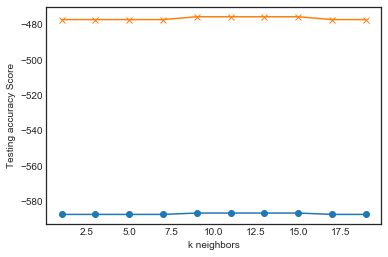

In [206]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KMeans(n_clusters=8)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [207]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.77777777777777779

# Support Vector Machine


In [208]:
# reminder zero is dead one is alive
new = df[["culture_Valyrian","allegiances_Night's Watch", "allegiances_Lannister", "allegiances_Baratheon","culture_Westeros", "got", "boolDeadRelations", "numDeadRelations", "isAlive", "allegiances_Stark", "culture_Northmen", "age", "allegiances_Wildling", "popularity", "gender", "isNoble" ]]
new['age'] = new['age'].fillna(new['age'].mean())
new.head()

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,culture_Valyrian,allegiances_Night's Watch,allegiances_Lannister,allegiances_Baratheon,culture_Westeros,got,boolDeadRelations,numDeadRelations,isAlive,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity,gender,isNoble
0,0,0,0,0,0,0,1,4,1,0,0,36.000000,0,0.458194,1,1
1,0,0,0,0,0,0,0,0,1,0,0,29.000000,0,0.571906,0,1
2,0,0,0,0,0,1,1,8,1,1,1,16.000000,0,1.000000,0,1
3,0,0,1,0,0,1,0,0,0,0,0,37.166667,0,0.344482,1,1
4,0,0,0,0,0,0,0,0,1,0,0,30.000000,0,0.709030,0,1


In [210]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [211]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,culture_Valyrian,allegiances_Night's Watch,allegiances_Lannister,allegiances_Baratheon,culture_Westeros,got,boolDeadRelations,numDeadRelations,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity,gender,isNoble
0,0,0,0,0,0,0,1,4,0,0,36.000000,0,0.458194,1,1
1,0,0,0,0,0,0,0,0,0,0,29.000000,0,0.571906,0,1
2,0,0,0,0,0,1,1,8,1,1,16.000000,0,1.000000,0,1
3,0,0,1,0,0,1,0,0,0,0,37.166667,0,0.344482,1,1
4,0,0,0,0,0,0,0,0,0,0,30.000000,0,0.709030,0,1


In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=y)

In [220]:
indexes=X_test.index
list(indexes)
newww= all_characters.iloc[list(indexes)]["name"]
newww.head()

60                  Bass
30                Andrik
63                 Becca
34    Archibald Yronwood
61       Bayard Norcross
Name: name, dtype: object

In [221]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [222]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.611


In [228]:
#A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.25
R-squared (R2 ): -0.17818181818181822


In [223]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

       dead       0.33      0.17      0.22         6
      alive       0.67      0.83      0.74        12

avg / total       0.56      0.61      0.57        18



In [224]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 1 1 0 1 1 0 1 1]
First 10 Actual labels: [1, 1, 1, 0, 0, 0, 1, 1, 1, 1]


In [225]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,1,0,Bass
1,1,1,Andrik
2,1,1,Becca
3,0,1,Archibald Yronwood
4,0,0,Bayard Norcross
5,0,1,Alys Karstark
6,1,1,Azzak
7,1,0,Arnolf Karstark
8,1,1,Aemon Estermont
9,1,1,Alyn Estermont


In [226]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.77777777777777779

In [227]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.22755209213118369, 'age'),
 (0.20692890304422776, 'popularity'),
 (0.12316583030787454, 'numDeadRelations'),
 (0.10266942499544754, 'isNoble'),
 (0.063237085088233558, 'gender'),
 (0.059429885566651762, 'got'),
 (0.039269656304692674, 'allegiances_Stark'),
 (0.036341201390208938, 'allegiances_Lannister'),
 (0.027897245658836178, 'culture_Northmen'),
 (0.027504825641197349, 'allegiances_Baratheon'),
 (0.023889831635686212, 'boolDeadRelations'),
 (0.022944462029290517, "allegiances_Night's Watch"),
 (0.022705198297359029, 'culture_Valyrian'),
 (0.016464357909110196, 'culture_Westeros'),
 (0.0, 'allegiances_Wildling')]

# Apply Gridsearch

In [229]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [230]:
indexes=X_test.index
list(indexes)

newww= all_characters.iloc[list(indexes)]["name"]
newww.head()

4        Aeron Greyjoy
62         Bearded Ben
18                Alyn
0       Addam Marbrand
28    Andrew Estermont
Name: name, dtype: object

In [242]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(C= 50, gamma=0.0001, kernel='linear')
model

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [243]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [244]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6111111111111112, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7777777777777778, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6666666666666666, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6111111111111112, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7777777777777778, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6666666666666666, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=5, gamma=0.0005, score=0.6111111111111112, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ...... C=5, gamma=0.0005, score=0.7222222222222222, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ...... C=5, gamma=0.0005, score=0.7222222222222222, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.6111111111111112, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.7222222222222222, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.7222222222222222, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.6111111111111112, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    4.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [245]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.0001}


In [246]:
print(grid.best_score_)

0.722222222222


In [247]:
predictions = grid.predict(X_test)

In [248]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["alive", "dead"]))

             precision    recall  f1-score   support

      alive       0.40      0.50      0.44         4
       dead       0.85      0.79      0.81        14

avg / total       0.75      0.72      0.73        18



In [249]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(30)

,Actual,Prediction,name
0,1,1,Aeron Greyjoy
1,1,1,Bearded Ben
2,0,1,Alyn
3,1,1,Addam Marbrand
4,1,1,Andrew Estermont
5,0,0,Aurane Waters
6,1,0,Albett
7,0,1,Archibald Yronwood
8,1,1,Alerie Hightower
9,1,1,Balon Swann
